In [152]:
%matplotlib inline

import os
import pandas as pd
import numpy  as np # for those extra mathematical functions.
from matplotlib import pyplot as plt

In [296]:
variables = ["dmar", "meduc", "feduc", "dbwt", "bmi_r", "priorterm", "mager9", 
             "apgar5r", "precare", "combgest"]

In [310]:
def fixapgar5r(num):
    if num == '5' or not num:
        return np.NaN
    else: return int(num)
    
def fixcombgest(num):
    if num == '99' or not num:
        return np.NaN
    else: return int(num)
    
def fixprecare(num):
    if num == '99' or num == '00' or num == '0' or num == '000' or not num:
        return np.NaN
    else: return int(num)

def fixdmar(string):
    if string == "3" or string == "9" or not string:
        return np.NaN
    else: 
        return int(string)

def fixmeduc(num):
    if num == '9' or not num:
        return np.NaN
    else: return int(num)
    
def fixfeduc(num):
    if num == '9' or not num:
        return np.NaN
    else: return int(num)
    
def fixdbwt(num):
    if num == '9999' or not num:
        return np.NaN
    else: return int(num)
    
def fixbmi_r(num):
    if num == '9' or not num:
        return np.NaN
    else: return int(num)
    
def fixpriorterm(num):
    if num == '99' or not num:
        return np.NaN
    else: return int(num)
    
def fixmager9(num):
    if not num:
        return np.NaN
    else: return int(num)

In [311]:
fixer = {"dmar":fixdmar, "meduc":fixmeduc, "feduc":fixfeduc, "dbwt":fixdbwt, "bmi_r":fixbmi_r, "priorterm":fixpriorterm,
        "mager9":fixmager9, "precare":fixprecare, "apgar5r":fixapgar5r, "combgest":fixcombgest}

In [312]:
data = pd.read_csv("natl2015.csv", usecols = variables, converters = fixer)
data.dtypes

mager9         int64
dmar           int64
meduc        float64
feduc        float64
priorterm    float64
precare      float64
bmi_r        float64
apgar5r      float64
combgest     float64
dbwt         float64
dtype: object

In [313]:
df = data[['mager9', 'dmar', 'meduc', 'feduc', 'priorterm', 'precare',
          'bmi_r', 'apgar5r', 'combgest', 'dbwt']].copy()

In [315]:
df.ix[(df["meduc"] < 3), 'meduc_fin'] = 1
df.ix[(df["meduc"] == 3), 'meduc_fin'] = 2
df.ix[(df["meduc"] > 3) & (df["meduc"] < 6), 'meduc_fin'] = 3
df.ix[(df["meduc"] == 6), 'meduc_fin'] = 4
df.ix[(df["meduc"] > 6), 'meduc_fin'] = 5

df.ix[(df["feduc"] < 3), 'feduc_fin'] = 1
df.ix[(df["feduc"] == 3), 'feduc_fin'] = 2
df.ix[(df["feduc"] > 3) & (df["feduc"] < 6), 'feduc_fin'] = 3
df.ix[(df["feduc"] == 6), 'feduc_fin'] = 4
df.ix[(df["feduc"] > 6), 'feduc_fin'] = 5

df.head()

,mager9,dmar,meduc,feduc,priorterm,precare,bmi_r,apgar5r,combgest,dbwt,meduc_fin,feduc_fin
0,3,2,2.0,2.0,0.0,4.0,3.0,4.0,43.0,3005.0,1.0,1.0
1,6,1,7.0,5.0,1.0,2.0,4.0,4.0,39.0,3501.0,5.0,3.0
2,2,1,4.0,4.0,0.0,7.0,NaN,4.0,38.0,3100.0,3.0,3.0
3,4,1,3.0,3.0,0.0,2.0,2.0,4.0,39.0,3115.0,2.0,2.0
4,4,1,6.0,3.0,0.0,2.0,4.0,4.0,41.0,3810.0,4.0,2.0


In [309]:
df.precare.unique()

array([  4.,   2.,   7.,   3.,   0.,   5.,   1.,   6.,   9.,  nan,   8.,
        10.])

In [316]:
df.count()

mager9       3988733
dmar         3988733
meduc        3870528
feduc        3354672
priorterm    3966486
precare      3728140
bmi_r        3794443
apgar5r      3974151
combgest     3985756
dbwt         3985085
meduc_fin    3870528
feduc_fin    3354672
dtype: int64

In [317]:
df.mean()

mager9          4.303429
dmar            1.402231
meduc           4.263361
feduc           4.188862
priorterm       0.407532
precare         2.941871
bmi_r           2.893593
apgar5r         3.829379
combgest       38.646317
dbwt         3270.135450
meduc_fin       2.882046
feduc_fin       2.827966
dtype: float64

In [318]:
df.std()

mager9         1.206363
dmar           0.490348
meduc          1.733877
feduc          1.756533
priorterm      0.874170
precare        1.498568
bmi_r          1.191332
apgar5r        0.454464
combgest       2.485487
dbwt         591.802251
meduc_fin      1.211744
feduc_fin      1.208680
dtype: float64

In [319]:
df.median()

mager9          4.0
dmar            1.0
meduc           4.0
feduc           4.0
priorterm       0.0
precare         3.0
bmi_r           3.0
apgar5r         4.0
combgest       39.0
dbwt         3315.0
meduc_fin       3.0
feduc_fin       3.0
dtype: float64

In [320]:
df.max()

mager9          9.0
dmar            2.0
meduc           8.0
feduc           8.0
priorterm      30.0
precare        10.0
bmi_r           6.0
apgar5r         4.0
combgest       47.0
dbwt         8165.0
meduc_fin       5.0
feduc_fin       5.0
dtype: float64

In [321]:
df.min()

mager9         1.0
dmar           1.0
meduc          1.0
feduc          1.0
priorterm      0.0
precare        1.0
bmi_r          1.0
apgar5r        1.0
combgest      17.0
dbwt         227.0
meduc_fin      1.0
feduc_fin      1.0
dtype: float64

In [322]:
df.groupby('dmar').count()

,mager9,meduc,feduc,priorterm,precare,bmi_r,apgar5r,combgest,dbwt,meduc_fin,feduc_fin
dmar,,,,,,,,,,,
1,2384342,2313488,2274622,2371152,2250614,2272494,2375771,2383114,2382154,2313488,2274622
2,1604391,1557040,1080050,1595334,1477526,1521949,1598380,1602642,1602931,1557040,1080050


In [323]:
df.groupby('dmar').mean()

,mager9,meduc,feduc,priorterm,precare,bmi_r,apgar5r,combgest,dbwt,meduc_fin,feduc_fin
dmar,,,,,,,,,,,
1,4.674624,4.881613,4.663037,0.404397,2.769914,2.833988,3.840229,38.737097,3321.763501,3.309214,3.156702
2,3.751783,3.344748,3.190234,0.412191,3.203802,2.982593,3.813252,38.511329,3193.409772,2.247348,2.135635


In [324]:
df.groupby('dmar').std()

,mager9,meduc,feduc,priorterm,precare,bmi_r,apgar5r,combgest,dbwt,meduc_fin,feduc_fin
dmar,,,,,,,,,,,
1,1.059734,1.733996,1.779823,0.858044,1.358562,1.150270,0.434256,2.312254,578.271357,1.185650,1.202796
2,1.200015,1.262512,1.200488,0.897583,1.655709,1.244834,0.482490,2.717178,603.250046,0.941974,0.885370


In [326]:
df.groupby('dmar').min()

,mager9,meduc,feduc,priorterm,precare,bmi_r,apgar5r,combgest,dbwt,meduc_fin,feduc_fin
dmar,,,,,,,,,,,
1,1,1.0,1.0,0.0,1.0,1.0,1.0,17.0,227.0,1.0,1.0
2,1,1.0,1.0,0.0,1.0,1.0,1.0,17.0,227.0,1.0,1.0


In [327]:
df.groupby('dmar').max()

,mager9,meduc,feduc,priorterm,precare,bmi_r,apgar5r,combgest,dbwt,meduc_fin,feduc_fin
dmar,,,,,,,,,,,
1,9,8.0,8.0,30.0,10.0,6.0,4.0,47.0,8165.0,5.0,5.0
2,9,8.0,8.0,25.0,10.0,6.0,4.0,47.0,8165.0,5.0,5.0


In [328]:
df.groupby('dmar').median()

,mager9,meduc,feduc,priorterm,precare,bmi_r,apgar5r,combgest,dbwt,meduc_fin,feduc_fin
dmar,,,,,,,,,,,
1,5,5.0,4.0,0.0,2.0,2.0,4.0,39.0,3355.0,3.0,3.0
2,4,3.0,3.0,0.0,3.0,3.0,4.0,39.0,3233.0,2.0,2.0


In [355]:
import seaborn as sns
sns.set(font="Times New Roman")

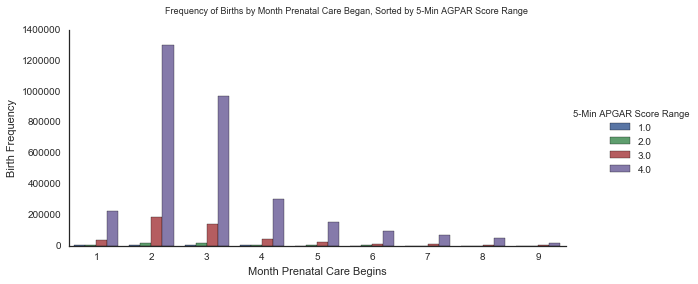

In [357]:
imgdf = df.rename(columns={'precare':'Month Prenatal Care Begins', 'apgar5r':'5-Min APGAR Score Range'})

with sns.axes_style('white'):
            g = sns.factorplot("Month Prenatal Care Begins", data=imgdf, aspect=2.0, kind='count',
                               hue='5-Min APGAR Score Range', order=range(1,10))
            g.set_ylabels('Birth Frequency')
            g.fig.subplots_adjust(top=.9)
            g.fig.suptitle('Frequency of Births by Month Prenatal Care Began, Sorted by 5-Min AGPAR Score Range', fontsize=9)
            
g.savefig("fig.png")